In [23]:
# General
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from pandas_profiling import ProfileReport

# With missforest we can use random forest to impute data. This is better than mean by far
# to avoid errors on loading missingpy
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics

# Model to apply
import lightgbm as lgb

# load stored data from data_imputation
%store -r train_final
%store -r test_final
train_df = train_final.copy()
test_df = test_final.copy()

## Training & validation with lightgbm

In [24]:
# getting ready x and y variables
x = train_df.drop(['Id','SalePrice'],axis=1)
y = train_df.SalePrice

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [33]:
# build the lightgbm model

model = lgb.LGBMRegressor(learning_rate = 0.09, max_depth = 5, random_state = 1) # lgb.LGBMClassifier() or LGBMRanker()
model.fit(x_train,y_train,eval_set=[(x_train,y_train), (x_test,y_test)],
          eval_metric='rmse')

[1]	training's rmse: 70775.9	training's l2: 5.00923e+09	valid_1's rmse: 80345.5	valid_1's l2: 6.4554e+09
[2]	training's rmse: 65922.6	training's l2: 4.3458e+09	valid_1's rmse: 75479.3	valid_1's l2: 5.69712e+09
[3]	training's rmse: 61552.5	training's l2: 3.78871e+09	valid_1's rmse: 71090.2	valid_1's l2: 5.05382e+09
[4]	training's rmse: 57441	training's l2: 3.29946e+09	valid_1's rmse: 67235.9	valid_1's l2: 4.52067e+09
[5]	training's rmse: 53811	training's l2: 2.89563e+09	valid_1's rmse: 63618.8	valid_1's l2: 4.04735e+09
[6]	training's rmse: 50498.7	training's l2: 2.55012e+09	valid_1's rmse: 60320.6	valid_1's l2: 3.63857e+09
[7]	training's rmse: 47453.7	training's l2: 2.25186e+09	valid_1's rmse: 57557.9	valid_1's l2: 3.31292e+09
[8]	training's rmse: 44716.8	training's l2: 1.99959e+09	valid_1's rmse: 55139.6	valid_1's l2: 3.04038e+09
[9]	training's rmse: 42338.5	training's l2: 1.79255e+09	valid_1's rmse: 52911.6	valid_1's l2: 2.79963e+09
[10]	training's rmse: 40225.7	training's l2: 1.61811

LGBMRegressor(learning_rate=0.09, max_depth=5, random_state=1)

In [34]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9663
Testing accuracy 0.8479


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

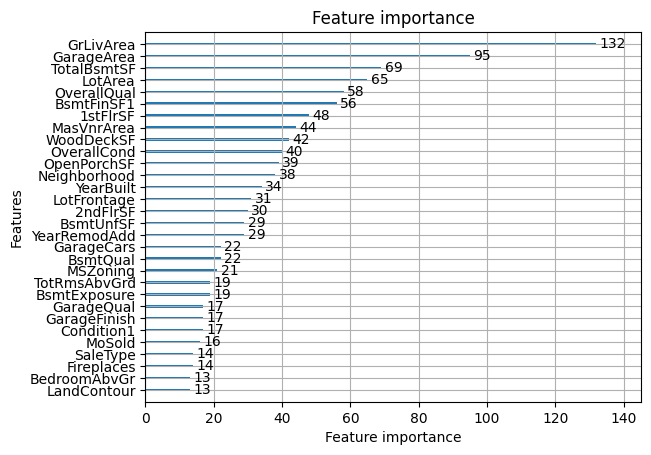

In [35]:
lgb.plot_importance(model, max_num_features = 30)


/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/lightgbm/plotting.py:372: UserWarning: More than one metric available, picking one to plot.
  _log_warning("More than one metric available, picking one to plot.")


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

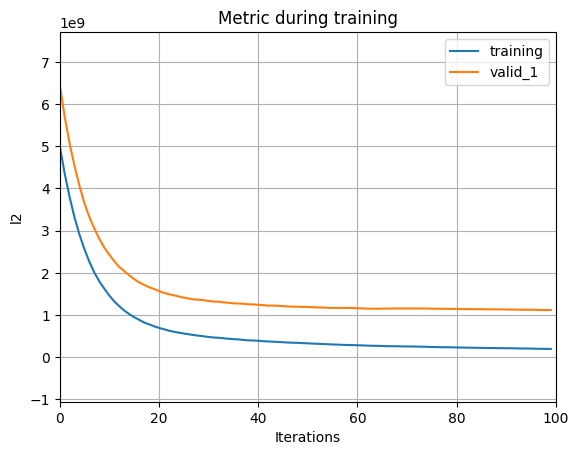

In [36]:
lgb.plot_metric(model)


In [40]:
# making predictions
model.predict(test_df.drop('Id', axis = 1))



array([118074.60076608, 162461.2393757 , 190401.71567294, ...,
       155806.01671787, 125781.39623047, 215652.76244602])

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

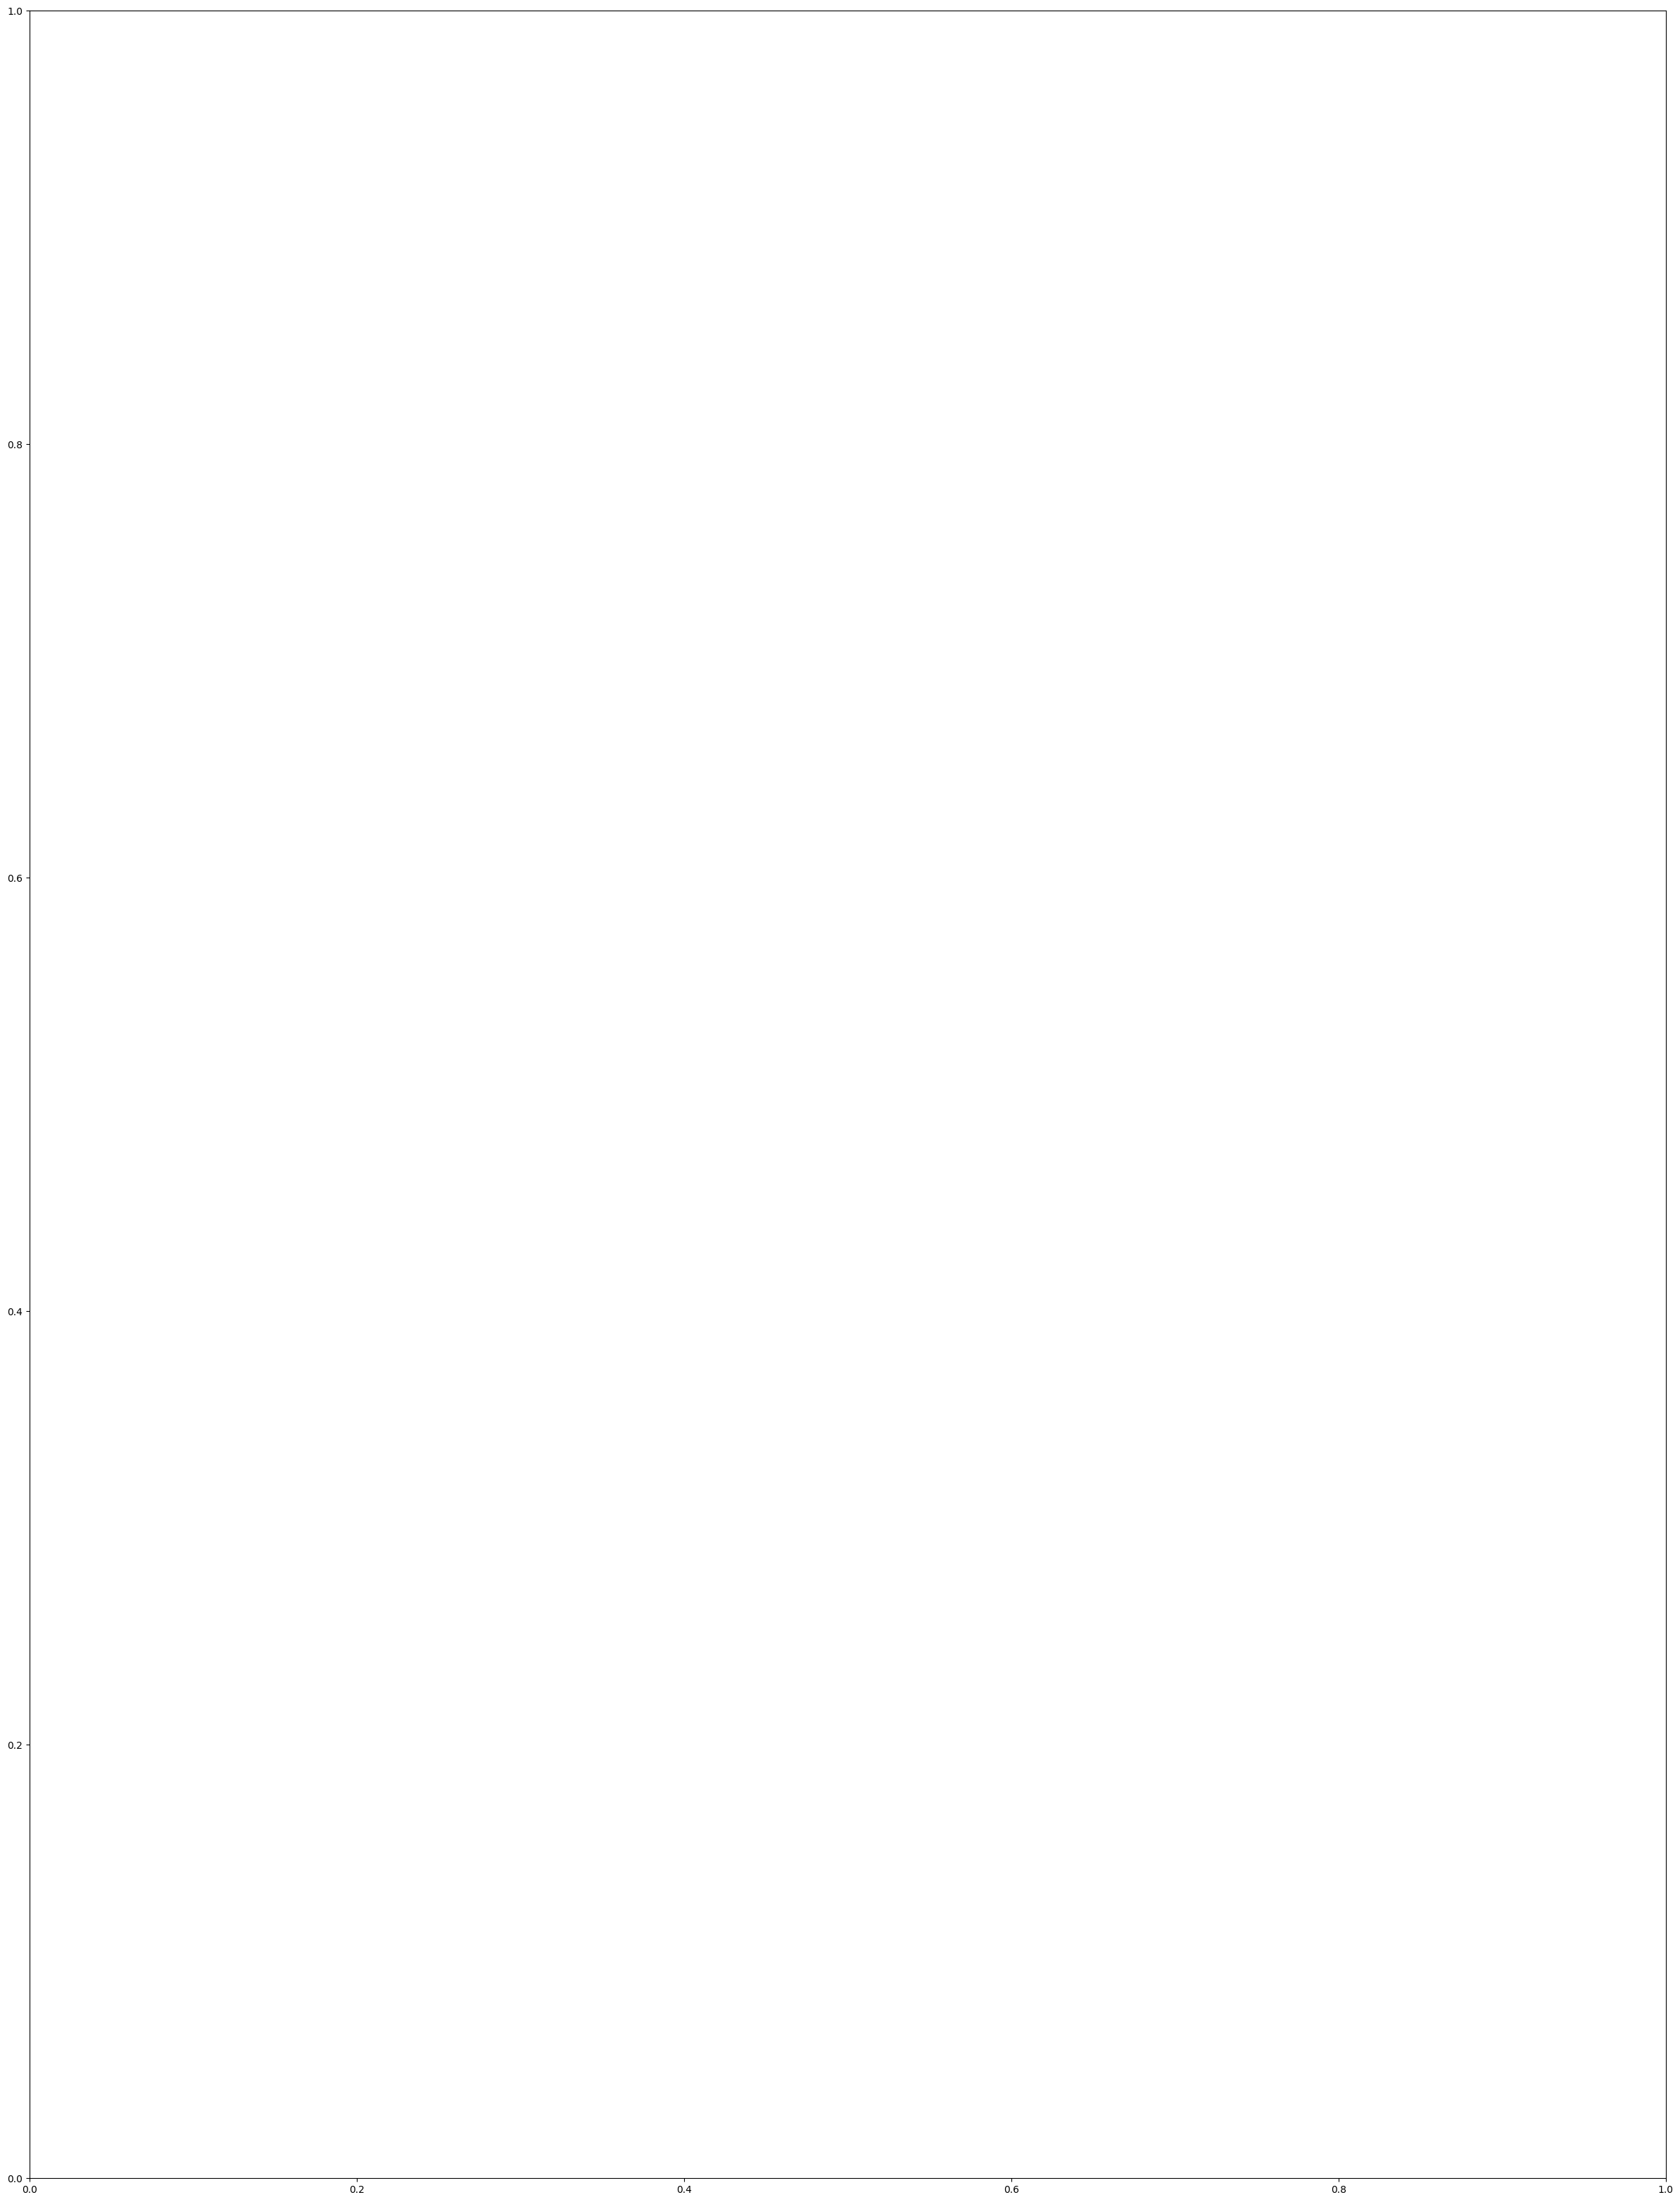

In [37]:
lgb.plot_tree(model,figsize=(30,40))


In [ ]:
# # graphic to classification problems
# metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')


In [ ]:
# # graphic to classification problems
# print(metrics.classification_report(y_test,model.predict(x_test)))
